# Generate gif of monthly snapshots of 2d data

to change file source location, modify fileloc

to change time range to be plotted, modify 'year', 'month' and 'n' variables

to change variable to be plotted, change 'selectedVariable' variable

In [13]:
# import libraries
import os
import shutil
from PIL import Image  # To create gifs

from Mapfct import *     # Here is where we call the function.

%matplotlib inline

ModuleNotFoundError: No module named 'Mapfct'

In [10]:
os.curdir

'.'

In [44]:
# Define data source

# BIO monthly-monthly
fileloc = 'https://thredds.ereefs.aims.gov.au/thredds/dodsC/ereefs/GBR4_H2p0_B3p1_Cq3b_Dhnd/monthly-monthly/EREEFS_AIMS-CSIRO_GBR4_H2p0_B3p1_Cq3b_Dhnd_bgc_monthly-monthly-'

In [45]:
# Define range of time

date_strs = []

# initial time
year=2010
month=12

# no of time steps
n = 24

# generate the time strings
for i in range(n):
    date_str = str(year) + '-' + format(month, '02')
    date_strs.append(date_str)
    month += 1
    if month > 12:
        year = year + (month // 12)
        month = month % 12


print(date_strs)


['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11']


In [46]:
# Define name of variable to be plotted
selectedVariable = 'DIN'

selectedDepthIndex = -1

In [47]:
# Set regional extent

# load longitude and latitude data
lon = nc_data['longitude'][:]
lat = nc_data['latitude'][:]

# Set lon lat extent
lon_min = 145.5
lon_max = 147

lat_min = -19
lat_max = -17

lon_lat_ext = [lon_min, lon_max, lat_min, lat_max]

# Find index of min and max lat and lon
lon_min_idx = np.searchsorted(lon, lon_min)
lon_max_idx = np.searchsorted(lon, lon_max)
lat_min_idx = np.searchsorted(lat, lat_min)
lat_max_idx = np.searchsorted(lat, lat_max)

lon_idx_ext = np.arange(lon_min_idx, lon_max_idx)
lat_idx_ext = np.arange(lat_min_idx, lat_max_idx)

In [48]:
# Define name of folder for storing images
dir = 'fig-intermediate/'+'fig-' + selectedVariable + '-monthly'

# We check if the folder exists, in this case if it does we remove it and 
# create a new one
if os.path.exists(dir):
    shutil.rmtree(dir)
os.makedirs(dir)

# Image file name
fname = dir+'/'+selectedVariable

In [49]:
# access first instace of data

# file name
inputFile = fileloc + date_strs[0] + '.nc'

# open file
nc_data = Dataset(inputFile, 'r')

In [50]:
nc_data[selectedVariable]

<class 'netCDF4.Variable'>
float32 FineSed(time, k, latitude, longitude)
    coordinates: time zc latitude longitude
    short_name: FineSed
    aggregation: Monthly
    units: kg m-3
    long_name: FineSed
    _ChunkSizes: [  1   1 133 491]
unlimited dimensions: time
current shape = (1, 17, 723, 491)
filling off

In [51]:
# get range of selected variable
var_min = np.nanmin(nc_data[selectedVariable][:, selectedDepthIndex, lat_idx_ext, lon_idx_ext])
var_max = np.nanmax(nc_data[selectedVariable][:, selectedDepthIndex, lat_idx_ext, lon_idx_ext])

print([var_min, var_max])

[np.float32(9.677419e-13), np.float32(0.0105969)]


In [52]:
# Variable range for the colorscale
curlvl = [var_min, var_max]

In [53]:
# Define plotting configurations

# Figure size
size = (6, 8)

# Used color
color = cmocean.cm.speed

# Region to plot
zoom = [145,-19,147,-17]

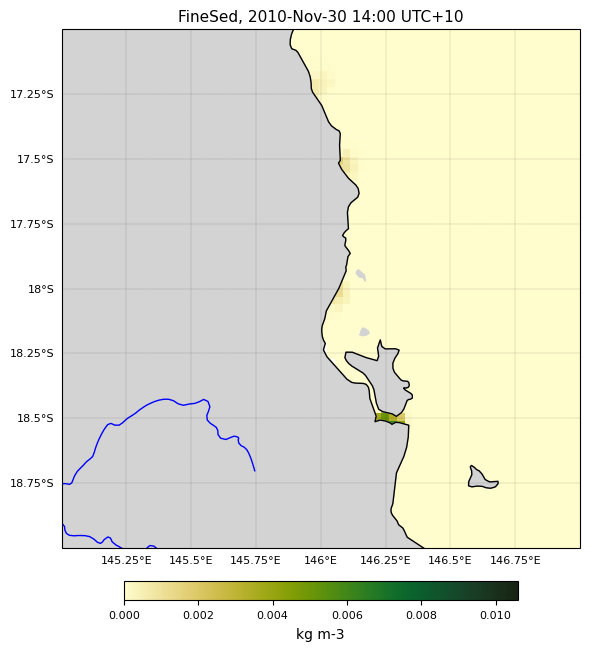

<Figure size 640x480 with 0 Axes>

In [54]:
# Plot one frame
eReefs_map(nc_data, 0, selectedDepthIndex, 
               selectedVariable, curlvl, color, size, fname+'-'+date_str, 
               None, None, None, zoom, 
               show=True, vecPlot=False, save=False)

In [55]:
# Generate all the individual images
imgs = []

for date_str in date_strs:

    # data file name
    inputFile = fileloc + date_str + '.nc'

    # open file
    nc_data = Dataset(inputFile, 'r')

    # plot snapshot images
    eReefs_map(nc_data, 0, selectedDepthIndex, 
               selectedVariable, curlvl, color, size, fname+'-'+date_str, 
               None, None, None, zoom, 
               show=False, vecPlot=False, save=True)

    # append image name to list
    imgs.append(f"{fname+'-'+date_str}_time{0:04}_zc{selectedDepthIndex:04}.png")

<Figure size 640x480 with 0 Axes>

In [56]:
# Combine all images into a single gif 

# Create the frames
frames = []
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('gif-monthly/'+'gif-'+selectedVariable+'-monthly'+'.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=500, loop=0)

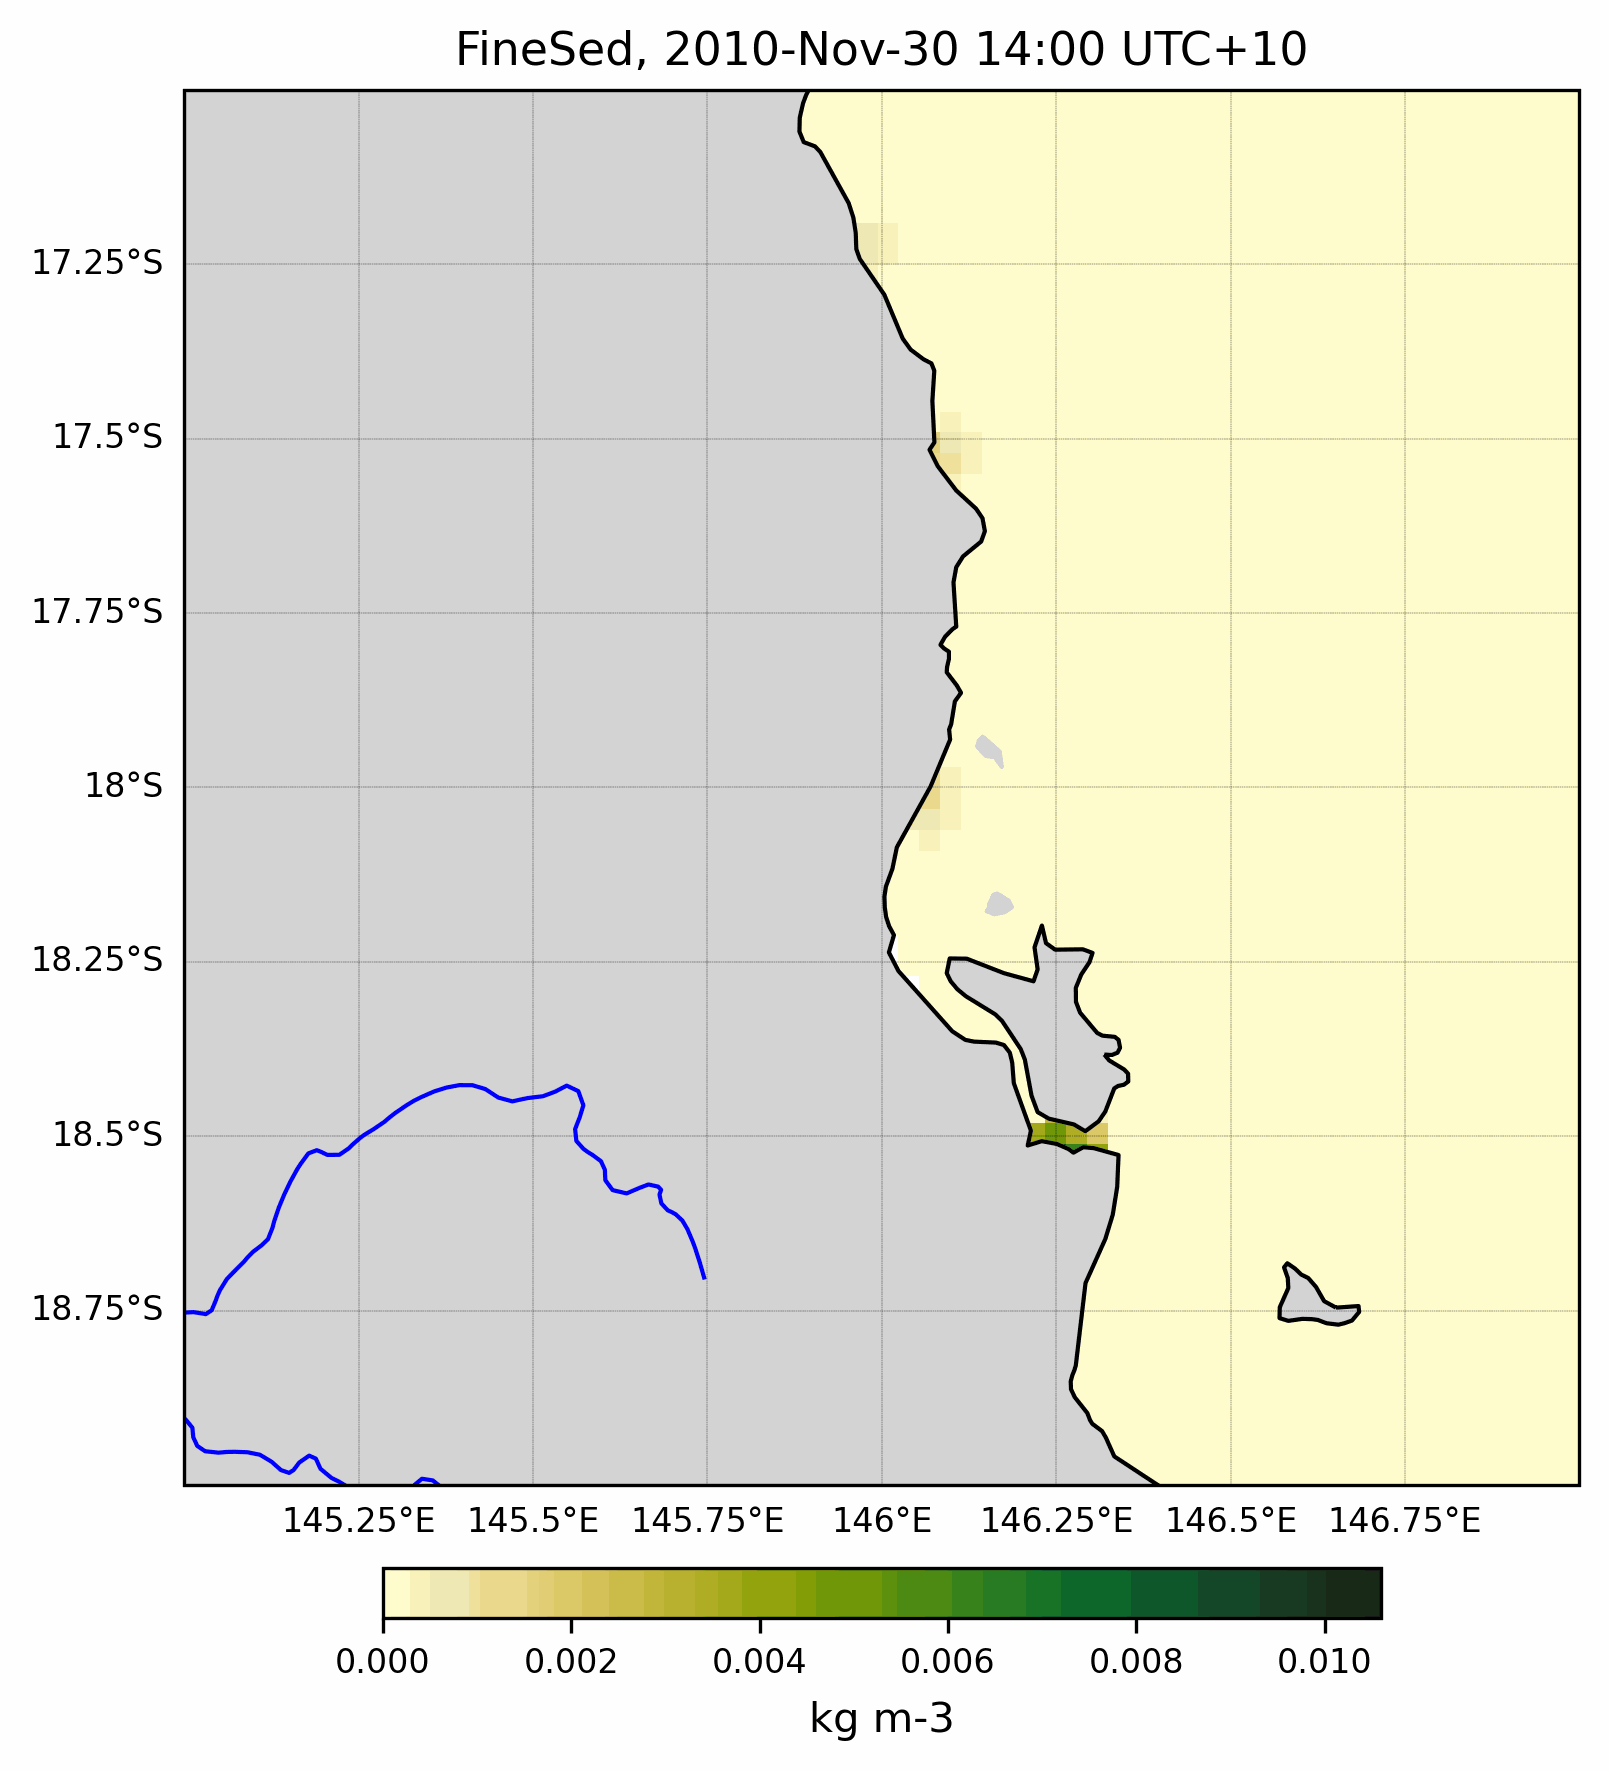

In [57]:
# Open generated gif
Image.open('gif-monthly/'+'gif-'+selectedVariable+'-monthly'+'.gif')